In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def FSim1(n, lambda_exp):
    return np.random.exponential(scale = 1.0/lambda_exp, size =  n)

In [3]:
def plot_survival_numbers(n, lambda_exp):
    
    fig, ax = plt.subplots()
    survival_times = FSim1(n, lambda_exp)
    stops = np.arange(0, 3.25, 0.25)
    survival_numbers = [sum(survival_times>threshold) for threshold in stops]

    ax.plot(stops, survival_numbers, 'k', label='Survival Numbers, Lambda = %s' % (lambda_exp))
    fig.suptitle('Survival Numbers of Users with Time', fontsize=14, fontweight='bold')
    legend = ax.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    return plt

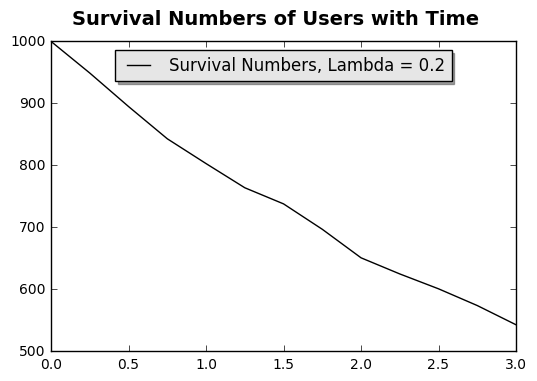

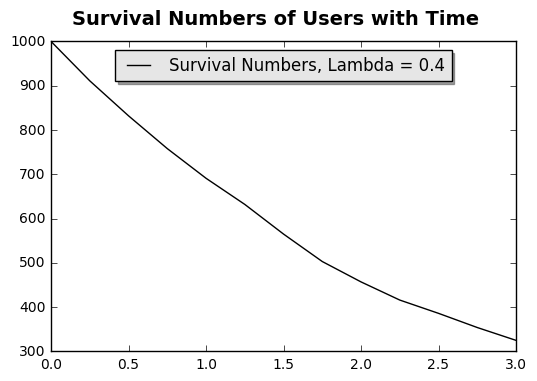

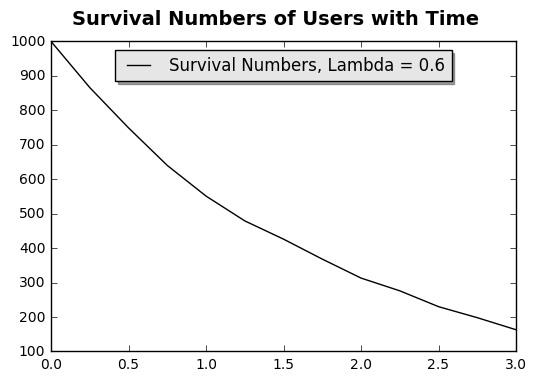

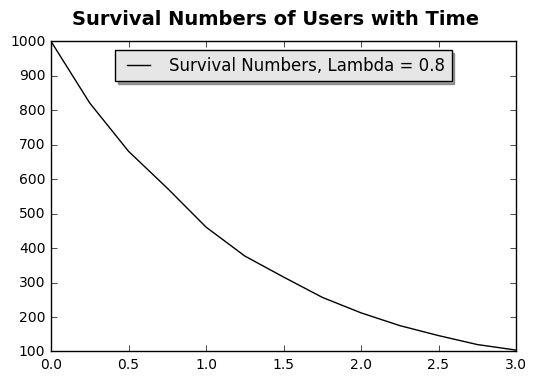

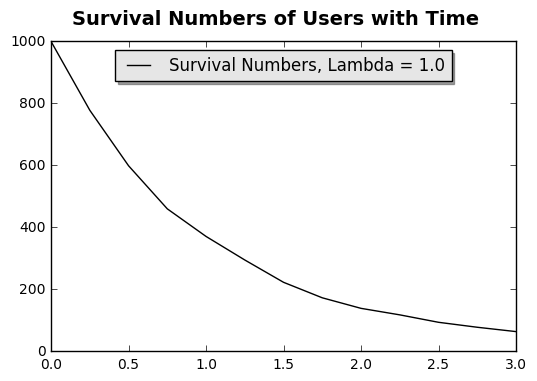

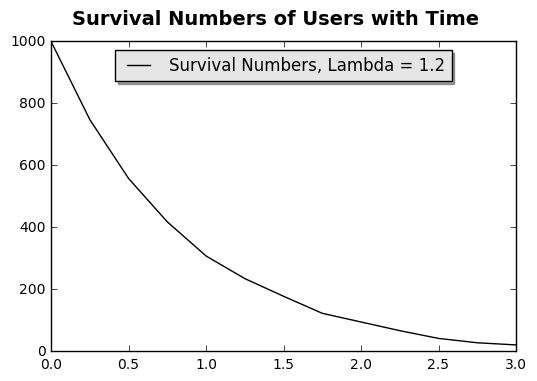

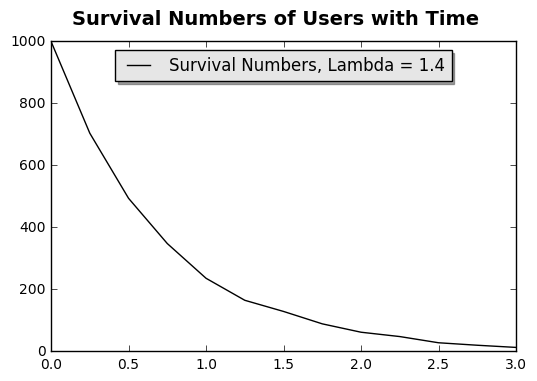

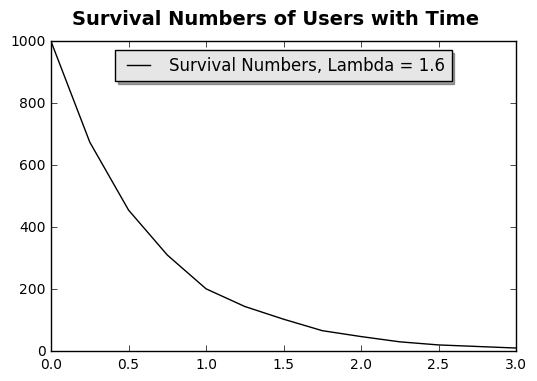

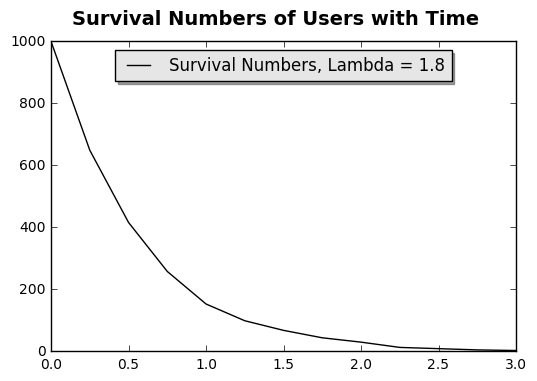

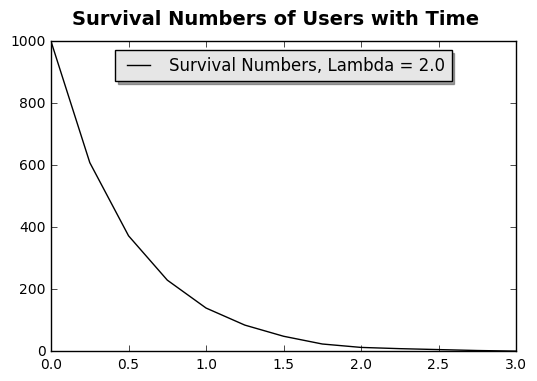

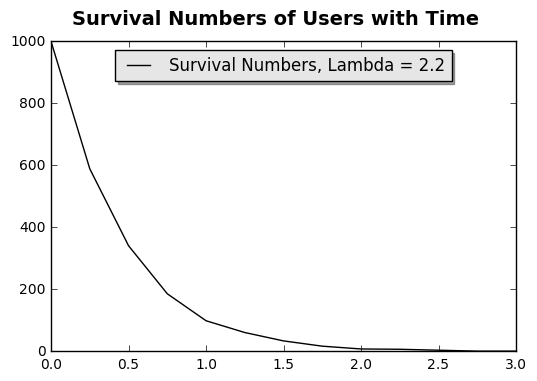

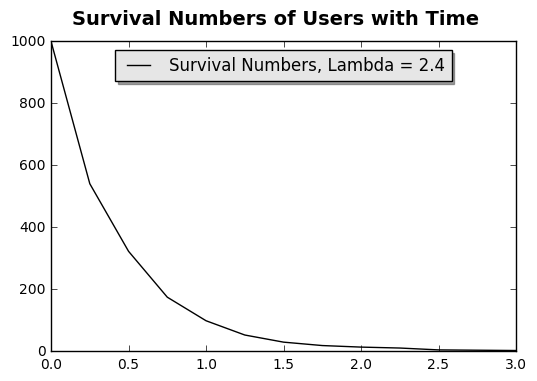

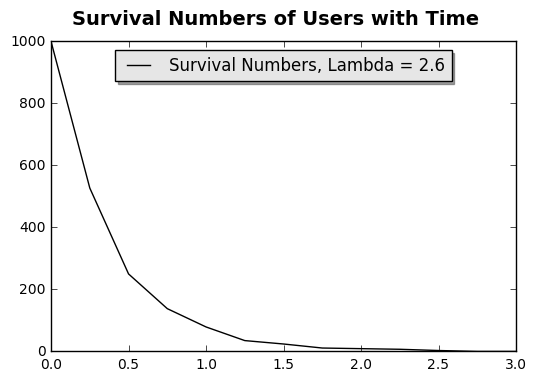

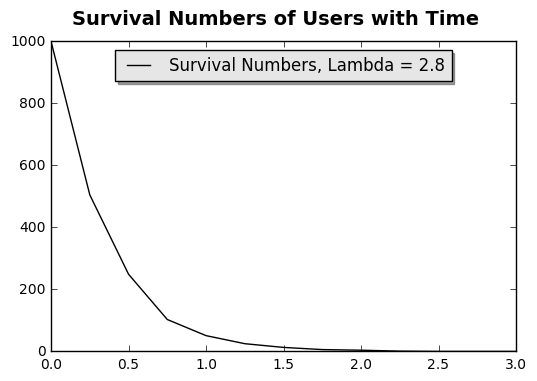

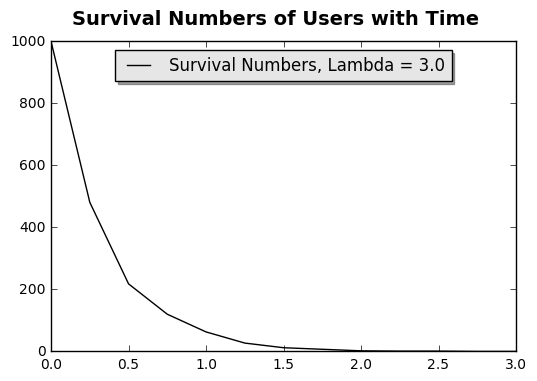

In [4]:
for each in np.arange(0.2, 3.2, 0.2):
    temp = plot_survival_numbers(1000,each)
    temp.show()



In [5]:
def FSim2(user_quit_times, breakpoints):
    
    sorted_times = sorted(user_quit_times)
    sorted_breakpoints = np.sort(breakpoints)
    
    solution = []
    
    for point in sorted_breakpoints:
        number_failed_to_reach = sum(np.array(sorted_times)<=point)
        solution.append(number_failed_to_reach)
        sorted_times = sorted_times[number_failed_to_reach:]
        
    solution.append(len(sorted_times))
    return solution

In [52]:
FSim2( [.20, .40], [.25, .5])

[1, 1, 0]

In [57]:
def EstLam1(user_quit_times):
    return 1.0/np.mean(user_quit_times)

In [54]:
sample = FSim1(1000, 1)

print EstLam1(sample)

1.0495624477


In [55]:
print EstLam1(sample)

1.0495624477


In [56]:
lambds_list = [EstLam1(np.random.choice(sample,1000)) for i in range(500)] 

In [57]:
lwr, upr = np.percentile(lambds_list, q=[2.5, 97.5])

In [58]:
print lwr, upr

0.986782125199 1.11868854679


In [121]:
nusers = [100, 200, 500, 1000, 2000, 5000, 10000]

lambds_list = []
lambds_lwr = []
lambds_upper = []

for n in nusers:
    sample = FSim1(n, 1)
    
    bootstrapped_lambds_list = [EstLam1(np.random.choice(sample,n)) for i in range(500)] 
    
    lwr, upr = np.percentile(bootstrapped_lambds_list, q=[2.5, 97.5])
    
    lambds_list.append(EstLam1(sample))
    lambds_lwr.append(lwr)
    lambds_upper.append(upr)
    


fig, ax = plt.subplots()

ax.plot(nusers, lambds_list, label='Estimated Lambdas')
ax.plot(nusers, lambds_lwr, label='Lower 95% Confidence Bound')
ax.plot(nusers, lambds_upper, label='Upper 95% Confidence Bound')

fig.suptitle('Estimated Lambdas and Confidence Intervals vs Number of Users', fontsize=14, fontweight='bold')
legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.savefig("3c.")
    
    

As the number of users increases, we draw more observations from the population distribution. So inferences about the population parameter using the unbiased estimator are more reliable. We see that here, as the confidence interval decreases.

In [97]:
# TERRIBLE LUMP OF CODE

def MLE1(m_list, breaks):
    return lambda x: m_list[0]*np.log((1- np.exp(-x*breaks[0]))) + np.sum([m_list[i]*np.log((-1.0*np.exp(-1.0*x*breaks[i])) 
        + (np.exp(-1.0*x*breaks[i-1]))) for i in range(1, len(m_list)-1)]) + m_list[-1]*(-1.0*x*breaks[-1])
    


In [103]:
x = [.25, .45, .75]
breaks = [0.5]

In [104]:
FSim2(x, breaks)

[2, 1]

In [105]:
PRT= MLE1( FSim2(x, breaks), breaks)
print PRT(1)

-2.36550425913


In [106]:
def MaxMLE(m_list, breaks, lambda_space):
       
    for each_lambda in lambda_space:
        index = np.argmax([MLE1(m_list, breaks)(each) for each in lambda_space])
        
    return lambda_space[index]

In [107]:
print MaxMLE( FSim2(np.array(x), breaks), breaks, np.arange(.1, 3, .05))

2.2


In [173]:
def simulation(n_users = 10000, pop_lambda = 1, breaks = [.25, .75]):
    
    diff_censored_unbiased =[]
    
    for iteration_simulation in range(1000):
#         print iteration_simulation
        sample = FSim1(n_users, pop_lambda)
        m_list = FSim2(np.array(sample), breaks)
        
        
        unbiased_lambda = EstLam1(sample)
        censored_maxmle_lambda = MaxMLE(m_list, breaks, np.arange(.75, 1.25, .05))
        
        diff_censored_unbiased.append(unbiased_lambda - censored_maxmle_lambda)
        
    print "Absolute", np.mean(np.absolute(diff_censored_unbiased))
    
    print np.mean(diff_censored_unbiased)
    


In [174]:
EstLam1([1,3])

0.5

In [175]:
simulation(breaks = [0.25, 0.75])

Absolute 0.00886163016985
-0.000993131122612


In [176]:
simulation(breaks = [0.25, 3])

Absolute 0.00871087817223
-0.000487913999304


In [177]:
simulation(breaks = [0.25, 10])

Absolute 0.0157719099275
6.82133348179e-05


In [172]:
for end in np.arange(0.3, 2.0, 0.1):
    print "Ending Point is %s" % (end)
    simulation(breaks = [0.25, end])

Ending Point is 0.3
Absolute 0.113945612979
0.01715335168
Ending Point is 0.4
Absolute 0.100310333831
0.01253045823
Ending Point is 0.5
Absolute 0.0867839379972
0.011180721874
Ending Point is 0.6
Absolute 0.0830503617227
0.00943026290194
Ending Point is 0.7
Absolute 0.0783132237589
0.00757492990776
Ending Point is 0.8
Absolute 0.0671181918247
0.0120445037924
Ending Point is 0.9
Absolute 0.0651088671614
0.0096485499949
Ending Point is 1.0
Absolute 0.0626078556749
0.00595907560183
Ending Point is 1.1
Absolute 0.058296320858
0.00511054191195
Ending Point is 1.2
Absolute 0.0555646325886
0.00333760012033
Ending Point is 1.3
Absolute 0.0528035548515
0.00953761800548
Ending Point is 1.4
Absolute 0.0531746910284
0.00614931448485
Ending Point is 1.5
Absolute 0.0480480887699
0.00365454241013
Ending Point is 1.6
Absolute 0.0506441530694
0.00147196332088
Ending Point is 1.7
Absolute 0.0502863089929
0.00465156030952
Ending Point is 1.8
Absolute 0.0498419212761
0.00440529405019
Ending Point is 1.9
A